<a href="https://colab.research.google.com/github/liber1988/liber1988/blob/main/id_card_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [4]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [21]:
# Open image and display
original = Image.open('pan_card_tampering/image/2012.jpg')
tampered = Image.open('pan_card_tampering/image/2022.jpg')

In [22]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (2968, 1768)
Tampered image size :  (2924, 1784)


In [23]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


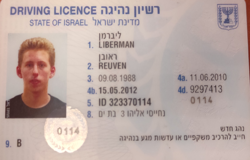

In [24]:
original

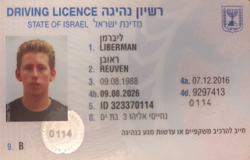

In [25]:
tampered

In [26]:
# load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [27]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [28]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.5201770350870366


In [29]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [30]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


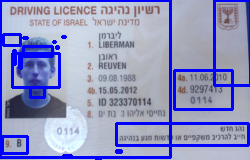

In [31]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


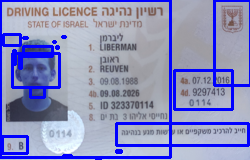

In [32]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


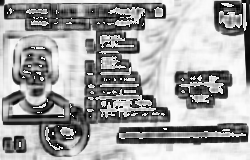

In [33]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


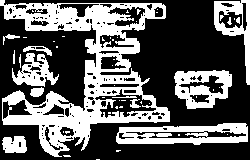

In [34]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)